The following code helps you visualize the submarine data and contains the crucial information about the data such as size of measurement domain, number of grid points and frequency modes etc. 

Our first task is to import the data into python (similarly MATLAB). Three files are available, "subdata.npy" is a numpy binary file most conveninet for Python users. "subtata.mat" is best if you plan to use MATLAB and "subdata.csv" is the same data in text format if you are having trouble with the other formats. In MATLAB you can simply use the load command. In Python, and in particular if you are using something like Colab you need some utilities to load the data. Here's a small snippet for loading data from your Google drive.   

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data_path = './subdata.npy'

d = np.load(data_path) # huge matrix of size 262144 x 49 (columns contain flattened 3d matrix of size 64x64x64)
data = d.reshape((64, 64, 64, 49))

# Collaborated with:

Eric Ye and Chenab

Dominant Frequency:  (2.199114857512855, 5.340707511102648, -6.911503837897545)


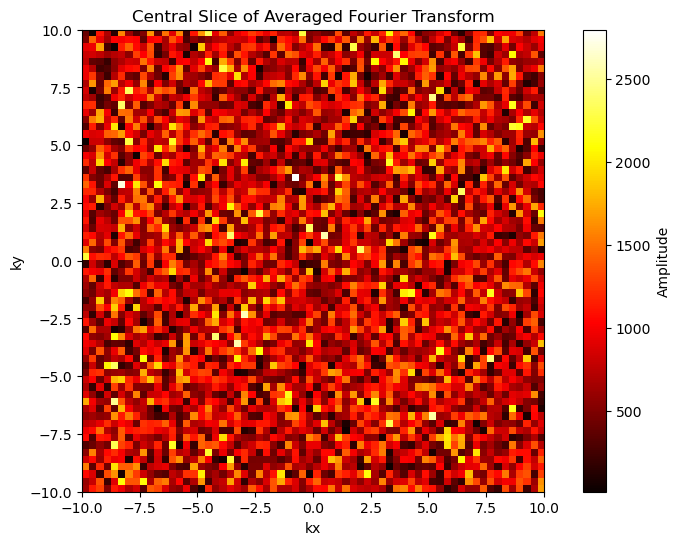

In [ ]:
L = 10
n = 64
x = np.linspace(-L, L, n + 1)[:-1]
k = (2 * np.pi / (2 * L)) * np.concatenate((np.arange(0, n//2), np.arange(-n//2, 0)))
ks = np.fft.fftshift(k)

average = np.zeros((n, n, n), dtype=complex)
# Averaging the Fourier Transforms of the 49 slices
for j in range(49):
    # Need to resize the data into a 4D array
    Sn = data[:, :, :, j]
    Stn = np.fft.fftn(Sn)
    average += Stn
average = np.abs(np.fft.fftshift(average))

flatAve = average.flatten()
max_index = np.argmax(flatAve)
max_coords = np.unravel_index(max_index, average.shape)
kx, ky, kz = ks[max_coords[0]], ks[max_coords[1]], ks[max_coords[2]]
print("Dominant Frequency: ", (kx, ky, kz))

plt.figure(figsize=(10, 6))
plt.imshow(average[:, :, average.shape[2] // 2], extent=[-L, L, -L, L], cmap='hot')
plt.title('Central Slice of Averaged Fourier Transform')
plt.xlabel('kx')
plt.ylabel('ky')
plt.colorbar(label='Amplitude')
plt.show()

In [ ]:
# import libraries for plotting isosurfaces
import plotly
import plotly.graph_objs as go
# utility for clearing output of cell as loop runs in notebook
from IPython.display import clear_output

# plot the data in time 